<a href="https://colab.research.google.com/github/DiegoAlv9423/Taller_3_EDA/blob/main/Taller_3_An%C3%A1lisis_bivariado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integrantes
## Taller 3 - Actividad Grupal . Comparte tu Análisis bivariado

DIEGO ALVAREZ CARO

CRISTIAN MUÑOZ ASTUDILLO

JULIAN MELENDEZ CRUZ

LORENA TONGUINO

# Contexto y problemática

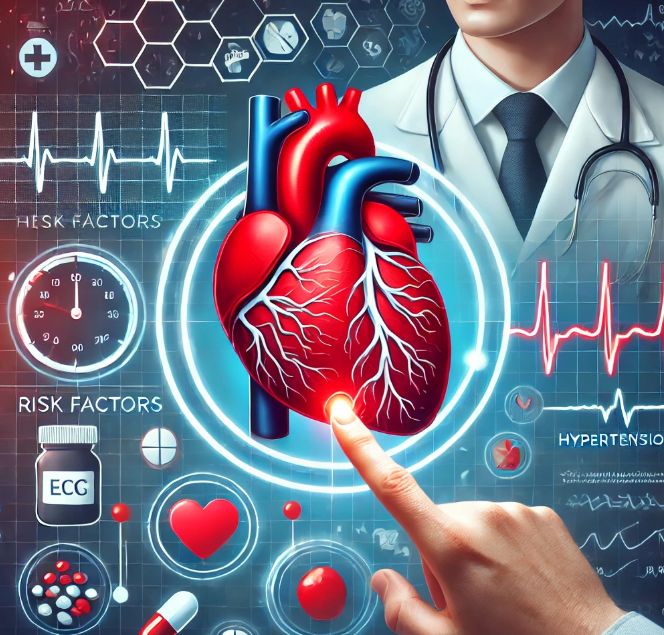

**Enfermedades cardiovasculares**

Las enfermedades cardiovasculares representan una de las principales causas de mortalidad a nivel mundial. Entre los factores de riesgo más estudiados se encuentran la hipertensión, la diabetes, el colesterol elevado y hábitos de vida poco saludables. Sin embargo, dentro del diagnóstico y monitoreo de pacientes con posible enfermedad cardíaca, ciertas mediciones fisiológicas resultan ser importantes.

Uno de estos indicadores es la frecuencia cardíaca máxima alcanzada (MaxHR), la cual refleja la capacidad del corazón para responder al esfuerzo físico. Se ha sugerido que valores anómalos de MaxHR pueden estar asociados con una mayor probabilidad de desarrollar enfermedades cardiovasculares. Adicionalmente, la angina inducida por el ejercicio (ExerciseAngina_Y) es un síntoma importante, ya que su presencia durante el esfuerzo físico puede indicar obstrucciones en las arterias coronarias.

Dado el impacto de estos factores en la salud cardíaca, es relevante analizar si existe una relación significativa entre MaxHR y la presencia de enfermedad cardíaca (HeartDisease). Además, explorar cómo influye ExerciseAngina_Y en esta relación puede aportar información valiosa para el diagnóstico y la prevención de riesgos cardiovasculares.

En este contexto, se llevó a cabo un análisis bivariado utilizando un conjunto de datos que contiene información sobre estas variables. Se realizaron imputaciones de datos para manejar posibles valores ausentes y se aplicaron métodos de visualización para identificar patrones en la relación entre MaxHR, ExerciseAngina_Y y HeartDisease.

A partir de este análisis, se formula la siguiente pregunta de investigación:

# Pregunta SMART

**¿Existe una relación significativa entre la frecuencia cardíaca máxima alcanzada (MaxHR) y la presencia de enfermedad cardíaca (HeartDisease), y cómo afecta la angina inducida por el ejercicio (ExerciseAngina_Y) esta relación en los datos analizados?**

# Descripción de las variables

Age: Edad del paciente [años]

Sex: Sexo del paciente [M: Masculino, F: Femenino]

ChestPainType: Tipo de dolor torácico [TA: Angina Típica, ATA: Angina Atípica, NAP: Dolor No Anginoso, ASY: Asintomático]

RestingBP: Presión arterial en reposo [mm Hg], mm Hg son milímetros de mercurio.

Cholesterol: Colesterol sérico [mg/dl], mg/dl son miligramos por decilitro

FastingBS: Glucemia en ayunas [1: si el nivel de glucemia en ayunas > 120 mg/dl, 0: de lo contrario]

RestingECG: Resultados del electrocardiograma en reposo [Normal: Normal, ST: presencia de anomalías en la onda ST-T (inversiones de la onda T y/o elevación o depresión del ST de > 0.05 mV), LVH: indicativo de probalbe o definitiva hipertrofia del ventrículo izquierdo según los criterios de criterios de Estes ( parámetros y puntuaciones utilizados en el análisis del electrocardiograma (ECG) )

MaxHR: Frecuencia cardíaca máxima alcanzada [Valor numérico entre 60 y 202]

ExerciseAngina: Angina inducida por el ejercicio [Y: Sí, N: No]

Oldpeak: Depresión del segmento ST (oldpeak) [Valor numérico medido en depresión]

ST_Slope: Pendiente del segmento ST en el pico del ejercicio [Up: inclinación ascendente, Flat: plana, Down: inclinación descendente]

HeartDisease: Etiqueta [1: presencia de enfermedad cardíaca, 0: Normal]

In [2]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures

In [3]:
# Cargamos el conjunto de datos
df = pd.read_csv('https://raw.githubusercontent.com/DiegoAlv9423/EDA_2025_1_DA/refs/heads/main/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Conteo de variable etiqueta
df.HeartDisease.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [5]:
# Porcentajes de cada valor de la eqtiuqeta: 55.33% sí presentó cardiopatía, 44.66% no presentó
df.HeartDisease.value_counts("normalize = True")

HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64

In [6]:
# Verificamos duplicados
df.duplicated().sum()

np.int64(0)

In [7]:
# Verificamos nulos
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Datos nulos

En el dataset no tenemos datos nulos, porque en lugar de datos faltantes se registró cero (0). Esto se identificó observando el dataset, los rangos de valores, gráficos y bibliografía asociada al tema, en el análiss univariado

In [8]:
# Conteo de ceros en las columnas donde el valor no puede ser cero
zero_counts = df[['Cholesterol', 'RestingBP', 'Oldpeak']].apply(lambda x: (x == 0).sum())
zero_counts_df = pd.DataFrame({'Variable': zero_counts.index, 'Cantidad de Ceros': zero_counts.values})
zero_counts_df


,Variable,Cantidad de Ceros
0,Cholesterol,172
1,RestingBP,1
2,Oldpeak,368


## Imputación con la media

In [9]:
df_imp_media= df.copy()
# Reemplazar ceros en 'Cholesterol', 'RestingBP' y 'Oldpeak' con la mediana de cada columna, ya que no es posible que estas variables sean cero
for i in ['Cholesterol', 'RestingBP', 'Oldpeak']:
    median_value = df_imp_media[i].median()
    df_imp_media.loc[df_imp_media[i] == 0, i] = median_value

df_imp_media.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.6,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.6,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.6,Up,0


Usando la media, por ejemplo, los valores de las filas 0, 2, y 4 de olpeak se reemplazan por 0.6

In [10]:
# Comprobrando que df_imp_media no tenga ceros en las columnas 'Cholesterol', 'RestingBP', 'Oldpeak'
zero_counts_media = df_imp_media[['Cholesterol', 'RestingBP', 'Oldpeak']].apply(lambda x: (x == 0).sum())
zero_counts_df_media = pd.DataFrame({'Variable': zero_counts_media.index, 'Cantidad de Ceros(media)':zero_counts_media.values})
zero_counts_df_media

,Variable,Cantidad de Ceros(media)
0,Cholesterol,0
1,RestingBP,0
2,Oldpeak,0


# Imputación con KNNImputer

In [11]:
df_imp_knn= df.copy()
#df_imp_knn.head()
df_imp_knn.shape

(918, 12)

In [12]:
# prompt: Reemplazar ceros por Nan, en las columnas 'Cholesterol', 'RestingBP' y 'Oldpeak' de df_imp_knn

import numpy as np
# Reemplazar ceros por NaN en las columnas especificadas
for col in ['Cholesterol', 'RestingBP', 'Oldpeak']:
    df_imp_knn[col] = df_imp_knn[col].replace(0, np.nan)

df_imp_knn.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,NaN,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,NaN,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,NaN,Up,0


In [13]:
# prompt: Reemplazar Nan en 'Cholesterol', 'RestingBP' y 'Oldpeak' de df_imp_knn, usando knnImputer

from sklearn.impute import KNNImputer

# Inicializar el imputador KNN
imputer = KNNImputer(n_neighbors=5)  # Puedes ajustar el número de vecinos

# Seleccionar las columnas para la imputación
cols_to_impute = ['Cholesterol', 'RestingBP', 'Oldpeak']

# Aplicar la imputación a las columnas seleccionadas
df_imp_knn[cols_to_impute] = imputer.fit_transform(df_imp_knn[cols_to_impute])

df_imp_knn.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,1.50,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,1.42,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,2.34,Up,0


Usando la KNN, por ejemplo, los valores de las filas 0, 2, y 4 de olpeak se reemplazan por 1.6,1.6, y 2.34, respectivamente. Asigna valores mayores que la media (0.6)

In [14]:
# Comprobrando que df_imp_knn no tenga ceros en las columnas 'Cholesterol', 'RestingBP', 'Oldpeak'
zero_counts_knn = df_imp_knn[['Cholesterol', 'RestingBP', 'Oldpeak']].apply(lambda x: (x == 0).sum())
zero_counts_df_knn = pd.DataFrame({'Variable': zero_counts_knn.index, 'Cantidad de Ceros(knn)':zero_counts_knn.values})
zero_counts_df_knn

,Variable,Cantidad de Ceros(knn)
0,Cholesterol,0
1,RestingBP,0
2,Oldpeak,0


# Eliminando las filas en lugar de imputar
Se eliminan las filas con ceros, en las columnas: 'Cholesterol', 'RestingBP', 'Oldpeak'

In [15]:
# prompt: crear una copia de df llamada df_drop, con las columnas de df, eliminando las filas donde  'Cholesterol', 'RestingBP', 'Oldpeak' tengan ceros

# Create a copy of the DataFrame
df_drop = df.copy()

# Drop rows where 'Cholesterol', 'RestingBP', or 'Oldpeak' are zero
df_drop = df_drop[(df_drop['Cholesterol'] != 0) &
                  (df_drop['RestingBP'] != 0) &
                  (df_drop['Oldpeak'] != 0)]

La que era la fila 1, en df (dataset original), ahora es la fila 0, ya que Oldpeak en la primera fila, tenía valor cero (0), por lo tanto se eliminó

In [16]:
# Nuevo tamaño de df_drop, luego de eliminar filas con ceros
df_drop.shape

(429, 12)

In [17]:
# Tamaño df original
df.shape

(918, 12)

In [18]:
# Se eliminó el 46.73% de las filas
por_drop= 429/918
por_drop

0.4673202614379085

# Predicciones con los métodos de imputación: media, KNN, y eliminación de nulos
Se compara los métodos de imputación media, knn,y elmétodo de eliminación. Para ello se las variables categóricas deben convertirse a un formato numérico. Se usa One-Hot Encoding para convertir cada categoría en una columna binaria (0 o 1).

Las columnas de variables categóricas son: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Calculando Score con el método de eliminación (df_drop)

In [19]:
# Perform One-Hot Encoding on categorical columns of df_drop
df_encoded_drop = pd.get_dummies(df_drop,
                            columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'],
                            drop_first=True) # Drop first to avoid multicollinearity

df_encoded_drop.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
8,37,140,207,0,130,1.5,1,True,False,False,False,True,False,True,True,False
11,58,136,164,0,99,2.0,1,True,True,False,False,False,True,True,True,False
13,49,140,234,0,140,1.0,1,True,False,False,False,True,False,True,True,False


In [20]:
# Las nuevas columnas de df_drop, con las variables categoricas codificadas
df_encoded_drop.keys()

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [21]:
# Predicciones con df_drop
predictores= ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']
objetivo= 'HeartDisease'
y= df_encoded_drop[objetivo].values
X= df_encoded_drop[predictores].values

In [22]:
from sklearn.model_selection import train_test_split
# Crear conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(343, 15)
(86, 15)
(343,)
(86,)


In [23]:
# Se importa el modelo
from sklearn.linear_model import LogisticRegression

#Se crea el modelo
log_reg = LogisticRegression(solver='lbfgs',max_iter=2000)
#se entrena el modelo
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [24]:
print('Score borrando los nulos - eliminando las filas con ceros de Cholesterol, RestingBP, Oldpeak')
Score_drop=log_reg.score(X_test, y_test)
Score_drop

Score borrando los nulos - eliminando las filas con ceros de Cholesterol, RestingBP, Oldpeak


0.8488372093023255

# Calculando Score con el método de la media (df_imp_media)

In [25]:
# Decodificando df_encoded_media con One-Hot Encoding
df_encoded_media = pd.get_dummies(df_imp_media,
                            columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'],
                            drop_first=True) # Drop first to avoid multicollinearity

df_encoded_media.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.6,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.6,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.6,0,True,False,True,False,True,False,False,False,True


In [26]:
# Predicciones con df_imp_media
predictores_med= ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']
objetivo_med= 'HeartDisease'
y_med= df_encoded_media[objetivo_med].values
X_med= df_encoded_media[predictores_med].values

In [27]:
# Crear conjuntos de entrenamiento y prueba
X_train_med, X_test_med, y_train_med, y_test_med = train_test_split(X_med, y_med, test_size=0.2, random_state=42)
print(X_train_med.shape)
print(X_test_med.shape)
print(y_train_med.shape)
print(y_test_med.shape)

(734, 15)
(184, 15)
(734,)
(184,)


In [28]:
#Se crea el modelo
log_reg_med = LogisticRegression(solver='lbfgs',max_iter=2000)
#se entrena el modelo
log_reg_med.fit(X_train_med, y_train_med)

LogisticRegression(max_iter=2000)

In [29]:
print('Score borrando los nulos - eliminando las filas con ceros en Cholesterol, RestingBP, Oldpeak')
Score_med=log_reg_med.score(X_test, y_test)
Score_med

Score borrando los nulos - eliminando las filas con ceros en Cholesterol, RestingBP, Oldpeak


0.872093023255814

### Calculando Score con el método KNN

In [30]:
# Decodificando df_imp_knn
df_encoded_knn = pd.get_dummies(df_imp_knn,
                            columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'],
                            drop_first=True) # Drop first to avoid multicollinearity

df_encoded_knn.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,1.50,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.00,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,1.42,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.50,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,2.34,0,True,False,True,False,True,False,False,False,True


In [31]:
# Predicciones con df_imp_knn codificado
predictores_knn= ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']
objetivo_knn= 'HeartDisease'
y_knn= df_encoded_knn[objetivo_med].values
X_knn= df_encoded_knn[predictores_med].values

In [32]:
# Crear conjuntos de entrenamiento y prueba
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)
print(X_train_knn.shape)
print(X_test_knn.shape)
print(y_train_knn.shape)
print(y_test_knn.shape)

(734, 15)
(184, 15)
(734,)
(184,)


In [33]:
#Se crea el modelo
log_reg_knn = LogisticRegression(solver='lbfgs',max_iter=2000)
#se entrena el modelo
log_reg_knn.fit(X_train_knn, y_train_knn)

LogisticRegression(max_iter=2000)

In [34]:
print('Score usando KNN para imputar las columnas de Cholesterol, RestingBP, Oldpeak (los ceros)')
Score_knn=log_reg_knn.score(X_test_knn, y_test_knn)
Score_knn


Score usando KNN para imputar las columnas de Cholesterol, RestingBP, Oldpeak (los ceros)


0.8586956521739131

# Calculando Score con datos nulos

In [35]:
df_nulos= df.copy()

# Reemplazar ceros por NaN en df_nulos
for col in ['Cholesterol', 'RestingBP', 'Oldpeak']:
    df_nulos[col] = df_nulos[col].replace(0, np.nan)

df_nulos.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,NaN,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,NaN,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,NaN,Up,0


In [36]:
# Decodificando df_nulos
df_encoded_nulos = pd.get_dummies(df_nulos,
                            columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'],
                            drop_first=True) # Drop first to avoid multicollinearity

df_encoded_nulos.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,NaN,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,NaN,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,NaN,0,True,False,True,False,True,False,False,False,True


In [37]:
# Predicciones con df_imp_knn codificado
predictores_nulos= ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']
objetivo_nulos= 'HeartDisease'
y_nulos= df_encoded_nulos[objetivo_nulos].values
X_nulos= df_encoded_nulos[predictores_nulos].values

In [38]:
# Crear conjuntos de entrenamiento y prueba
X_train_nulos, X_test_nulos, y_train_nulos, y_test_nulos = train_test_split(X_nulos, y_nulos, test_size=0.2, random_state=42)
print(X_train_nulos.shape)
print(X_test_nulos.shape)
print(y_train_nulos.shape)
print(y_test_nulos.shape)

(734, 15)
(184, 15)
(734,)
(184,)


In [39]:
# Para el método de conservación de los datos nulos, se crea el modelo con HistGradientBoostingClassifier

from sklearn.ensemble import (HistGradientBoostingClassifier)

hgbm = HistGradientBoostingClassifier(random_state=42)
hgbm.fit(X_train_nulos, y_train_nulos)
Score_nulos= hgbm.score(X_test_nulos, y_test_nulos)
Score_nulos

0.8695652173913043

In [40]:
# prompt: tabla con Score_drop, Score_med, Score_knn

import pandas as pd
data = {'Method': ['Drop', 'Mean', 'KNN', 'Nulos'],
        'Score': [Score_drop, Score_med, Score_knn, Score_nulos]}
score_table = pd.DataFrame(data).round(3)
score_table


,Method,Score
0,Drop,0.849
1,Mean,0.872
2,KNN,0.859
3,Nulos,0.870


## Comparación de métodos de imputación: media, KNN, y eliminación de datos nulos

El menor Score es para el método Drop:eliminación de filas con ceros en las columnas 'Cholesterol', 'RestingBP' y 'Oldpeak'. Esto debido a que las filas con datos nulos representan el 46.73% de las filas es un procentaje representativo, y al eliminarlas se pierde información valiosa para el entrenamiento del modelo, se reduce muho los datos

El mayor Score es para el método de reemplazo con la media, score de 0.872, prácticamente igual que el método de nulos que tiene un score de 0.87

El método de KNN tiene un score de 0.864, más cercano al de la media y nulos, comparado con el de drop (eliminación)

**Se selecciona el método de la media para reemplazar los datos faltantes en el dataset**

## Imputación con MICE

MICE: Multiple Imputations by Chained Equations (Imputaciones múltiples mediante ecuaciones encadenadas)

Se crea un módelo para predecir los valores faltantes. Se reemplaza los valores faltantes con la media, para el entrenamiento, y se deja como faltante sólo una de las columnas corresppondiente a los valores que se desea predecir. Se hace esto para cada columna con faltantes, hasta  obtener todo los valores faltantes predichos por el modelo

In [41]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [42]:
# Reemplazar ceros por NaN en las columnas 'Cholesterol', 'RestingBP' y 'Oldpeak'
df_nan=df.copy()
for col in ['Cholesterol', 'RestingBP', 'Oldpeak']:
    df_nan[col] = df_nan[col].replace(0, np.nan)

df_nan.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,NaN,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,NaN,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,NaN,Up,0


In [43]:
# Define imputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(random_state=100, max_iter=10)

In [44]:
# Definir el conjunto de entrenamiento con las variables (númericas) que tienen datos nulos
df_train_imp = df_nan.loc[:,  ['Cholesterol', 'RestingBP', 'Oldpeak', 'HeartDisease']]
df_train_imp.head()

,Cholesterol,RestingBP,Oldpeak,HeartDisease
0,289.0,140.0,NaN,0
1,180.0,160.0,1.0,1
2,283.0,130.0,NaN,0
3,214.0,138.0,1.5,1
4,195.0,150.0,NaN,0


In [45]:
# fit on the dataset
imputer.fit(df_train_imp)

IterativeImputer(random_state=100)

In [46]:
df_imputed = imputer.transform(df_train_imp)
df_imputed[:10]

array([[289.        , 140.        ,   1.11298094,   0.        ],
       [180.        , 160.        ,   1.        ,   1.        ],
       [283.        , 130.        ,   1.0151058 ,   0.        ],
       [214.        , 138.        ,   1.5       ,   1.        ],
       [195.        , 150.        ,   1.22103588,   0.        ],
       [339.        , 120.        ,   0.91091918,   0.        ],
       [237.        , 130.        ,   1.0197885 ,   0.        ],
       [208.        , 110.        ,   0.82576877,   0.        ],
       [207.        , 140.        ,   1.5       ,   1.        ],
       [284.        , 120.        ,   0.91651807,   0.        ]])

Para la variable Oldpeak, en las filas 0, 2 y 4, los valores que arroja imputer son: 1.11, 1.01, y 1.22

In [47]:
# Reemplazando con los valores imputados en df_nan
df_nan.loc[:, ['Cholesterol', 'RestingBP', 'Oldpeak', 'HeartDisease']] = df_imputed
df_nan.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,1.112981,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.000000,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,1.015106,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.500000,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,1.221036,Up,0
5,39,M,NAP,120.0,339.0,0,Normal,170,N,0.910919,Up,0
6,45,F,ATA,130.0,237.0,0,Normal,170,N,1.019789,Up,0
7,54,M,ATA,110.0,208.0,0,Normal,142,N,0.825769,Up,0
8,37,M,ASY,140.0,207.0,0,Normal,130,Y,1.500000,Flat,1
9,48,F,ATA,120.0,284.0,0,Normal,120,N,0.916518,Up,0


In [48]:
# Instalando MICE
!pip install miceforest --no-cache-dir


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
import miceforest as mf

In [50]:
# Crear kernel.
kds = mf.ImputationKernel(
  df_train_imp,
  random_state=100
)

# Ejecute el algoritmo MICE durante 2 iteraciones
kds.mice(2)

# Devolver el conjunto de datos completo (con los valores faltantes predichos)
df_imputed = kds.complete_data()

In [51]:
# Así están los datos de entrenamiento
df_train_imp.head()

,Cholesterol,RestingBP,Oldpeak,HeartDisease
0,289.0,140.0,NaN,0
1,180.0,160.0,1.0,1
2,283.0,130.0,NaN,0
3,214.0,138.0,1.5,1
4,195.0,150.0,NaN,0


In [52]:
# Estos son los valores con los datos imputados por MICE - 2 iteraciones (ciclos de imputación)
df_imputed.head()

,Cholesterol,RestingBP,Oldpeak,HeartDisease
0,289.0,140.0,1.0,0
1,180.0,160.0,1.0,1
2,283.0,130.0,2.0,0
3,214.0,138.0,1.5,1
4,195.0,150.0,0.2,0


In [53]:
df_imputed.isnull().sum()

Cholesterol     0
RestingBP       0
Oldpeak         0
HeartDisease    0
dtype: int64

Para la variable Oldpeak, en las filas 0, 2 y 4, los valores que arroja MICE, con 2 iteraciones son: 1, 2, y 0.2...hay más diferencia entre los valores, que con otros métodos de imputación

In [54]:
# Ahora se aumentan la iteraciones a 50
kds.mice(iterations=10, n_estimators=50)

In [55]:
# Imputación con 10 iteraciones
df_imputed2 = kds.complete_data()
df_imputed2.head()

,Cholesterol,RestingBP,Oldpeak,HeartDisease
0,289.0,140.0,1.0,0
1,180.0,160.0,1.0,1
2,283.0,130.0,0.7,0
3,214.0,138.0,1.5,1
4,195.0,150.0,1.5,0


Ahora, para la variable Oldpeak, en las filas 0, 2 y 4, los valores que arroja MICE, con 10 iteraciones son: 0.5,1,2

con 2 iteraciones arrojó: 1, 2, 0.2.

In [56]:
df_imputed2.isnull().sum()

Cholesterol     0
RestingBP       0
Oldpeak         0
HeartDisease    0
dtype: int64

### Comparación de la distribución de los datos imputados vs datos originales







En cada iteración, se actualizan los valores imputados para cada variable faltante utilizando las demás variables como predictoras

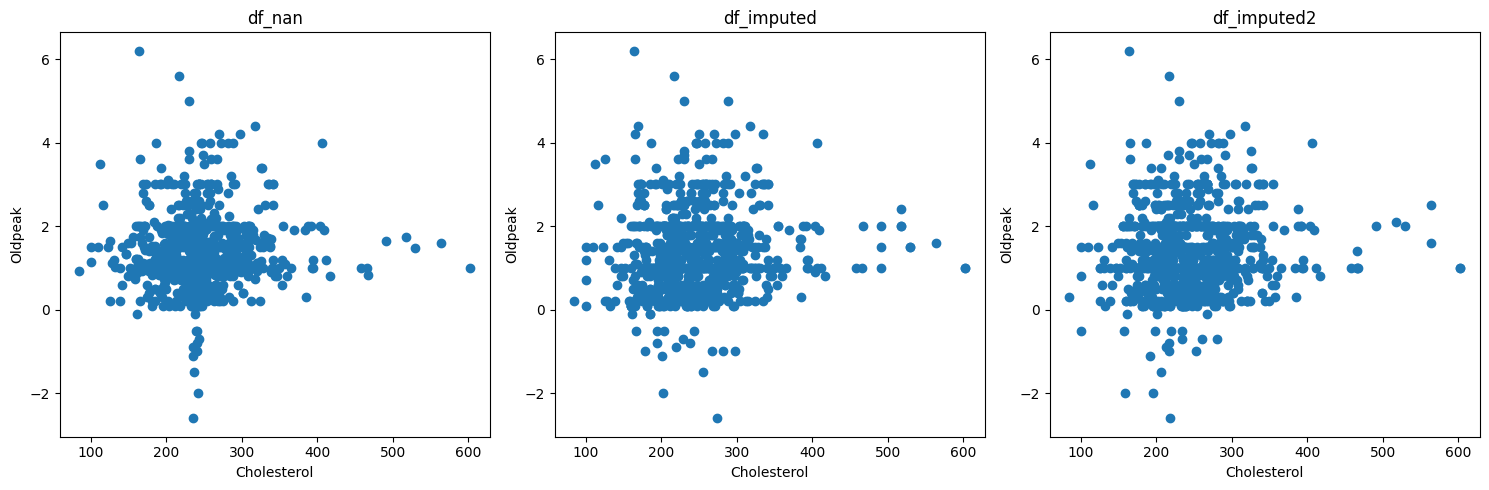

In [57]:
# prompt: realizar un gráfico de dispersion de la variable Cholesterol vs Oldpeak para cada dataframe: df_nan, df_imputed, df_imputed2

import matplotlib.pyplot as plt

# Create scatter plots for each DataFrame
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df_nan['Cholesterol'], df_nan['Oldpeak'])
plt.title('df_nan')
plt.xlabel('Cholesterol')
plt.ylabel('Oldpeak')

plt.subplot(1, 3, 2)
plt.scatter(df_imputed['Cholesterol'], df_imputed['Oldpeak'])
plt.title('df_imputed')
plt.xlabel('Cholesterol')
plt.ylabel('Oldpeak')

plt.subplot(1, 3, 3)
plt.scatter(df_imputed2['Cholesterol'], df_imputed2['Oldpeak'])
plt.title('df_imputed2')
plt.xlabel('Cholesterol')
plt.ylabel('Oldpeak')

plt.tight_layout()
plt.show()


la distribución de los datos imputados con MICE coincide con la distribución de los datos observados.

In [58]:
# prompt: calcular los estadísticos de las Cholesterol Oldpeak y  RestingBP para cada dataframe: df_nan, df_imputed, df_imputed2

# Calculate statistics for Cholesterol, Oldpeak, and RestingBP for each DataFrame

# Statistics for df_nan
df_nan_stats = df_nan[['Cholesterol', 'Oldpeak', 'RestingBP']].describe()
print("Statistics for df_nan:\n", df_nan_stats)

# Statistics for df_imputed
df_imputed_stats = df_imputed[['Cholesterol', 'Oldpeak', 'RestingBP']].describe()
print("\nStatistics for df_imputed:\n", df_imputed_stats)

# Statistics for df_imputed2
df_imputed2_stats = df_imputed2[['Cholesterol', 'Oldpeak', 'RestingBP']].describe()
print("\nStatistics for df_imputed2:\n", df_imputed2_stats)


Statistics for df_nan:
        Cholesterol     Oldpeak   RestingBP
count   918.000000  918.000000  918.000000
mean    244.503612    1.380537  132.541790
std      53.378244    0.821252   17.989952
min      85.000000   -2.600000   80.000000
25%     214.000000    0.943290  120.000000
50%     241.010609    1.200000  130.000000
75%     267.000000    1.774034  140.000000
max     603.000000    6.200000  200.000000

Statistics for df_imputed:
        Cholesterol     Oldpeak   RestingBP
count   918.000000  918.000000  918.000000
mean    246.465142    1.372985  132.559913
std      62.729503    0.961681   17.999158
min      85.000000   -2.600000   80.000000
25%     207.000000    0.800000  120.000000
50%     238.000000    1.200000  130.000000
75%     277.000000    2.000000  140.000000
max     603.000000    6.200000  200.000000

Statistics for df_imputed2:
        Cholesterol     Oldpeak   RestingBP
count   918.000000  918.000000  918.000000
mean    245.061002    1.394227  132.538126
std      60.71

La media de Cholesterol y oldpeak de df_imputed2 (10 iteraciones) coincida más con la media de df_nan, que la de df_imputed (2 iteraciones)

La media de RestingBP son casi iguales para los tres datasets, porque RestingBP sólo tiene 1 dato nulo


<font color="red">En un futuro análisis más profundo, y para poder comparar el método de imputación con MICE, se podría "ocultar" aleatoriamente un 10% de los valores en una columna numérica. Luego, aplicamos MICE para imputar esos valores y calculamos el RMSE entre los valores imputados y los reales. Esa métrica (RMSE) serviría como un "score" del modelo de imputación con MAICE, que podemos comparar con el Score calculado para los tros métodos</font>

# **Selección de las variables ExerciseAngina_Y y MaxHR y justificación**

Para este análisis seleccinaremos las dos variables distintas de mayor correlación

<font color="red">Al incluir las variables categóricas para el cálculo de las corelaciones, encontramos que ST_Slop es la de mayor correlación. Teniendo en cuenta que para abordadrla es necesario abordar tanto ST_Slop_Flat, como ST_Slop_Up, y lo mismo sucede con ChestPainType, en este análisis bivariado, se se selecciona las variables: ExerciseAngina_Y y MaxHR, y se considerann estas variables para un futuro análisis más profundo </font>

## Importancia de las variables

**ExerciseAngina: Angina inducida por el ejercicio** [Y: Sí, N: No]. Se transformó a **ExerciseAngina_Y** [1:sí, 0:no]

Indica presencia (1) de angina (dolor en el pecho) durante una prueba de esfuerzo o actividad física (0 si no lo presenta). Experimentar angina puede ser un signo de enfermedad coronaria o un mayor riesgo de ataque cardíaco.

Referencia de su importancia:

NattionalHeart, Lung, and Blood Institute. Última actualización el27 de diciembre de 2024.Coronary Heart Disease -Symptoms. https://www.nhlbi.nih.gov/health/coronary-heart-disease/symptoms


"La enfermedad coronaria suele desarrollarse a lo largo de muchos años. La placa se acumula y estrecha la arteria coronaria. Es más probable que tenga síntomas como dolor en el pecho, dificultad para respirar o dolor de cuello cuando se esfuerza. Los síntomas suelen desaparecer con el descanso y vuelven cuando está activo o bajo estrés. Los síntomas pueden empeorar a medida que la placa se sigue acumulando."


 **MaxHR (frecuencia cardíaca máxima alcanzada (Maximum Heart Rate)):**

 Variable elegida para el análisis univariado. Recordemos que:

 La Frecuencia cardíaca (FC) muy baja durante el ejercicio puede indicar problemas de conducción eléctrica o insuficiencia cardíaca.

Frecuencia cardíaca (FC) excesivamente alta puede estar asociada con arritmias o estrés excesivo en el corazón.

Referncias de estudios:
 Vázquez et al., 2023, FRECUENCIA CARDIACA: Una revisión sistemática, *Enfermeria en Cardiologia*, 30(90), DOI: https://doi.org/10.59322/90.7186.LR5

 Biasco et al.,2023, Valor pronóstico de las frecuencias cardiacas bajas en pacientes ingresados con infarto agudo de miocardio, *Revista Española de Cardiología*, 76(8), https://doi.org/10.1016/j.recesp.2023.01.008:


In [59]:
correlation_matrix_pearson = df_encoded_media.corr()['HeartDisease'].sort_values(ascending=False)
correlation_matrix_pearson.round(2)


HeartDisease         1.00
ST_Slope_Flat        0.55
ExerciseAngina_Y     0.49
Oldpeak              0.37
Sex_M                0.31
Age                  0.28
FastingBS            0.27
RestingBP            0.12
RestingECG_ST        0.10
Cholesterol          0.04
ChestPainType_TA    -0.05
RestingECG_Normal   -0.09
ChestPainType_NAP   -0.21
MaxHR               -0.40
ChestPainType_ATA   -0.40
ST_Slope_Up         -0.62
Name: HeartDisease, dtype: float64

Con pearson las dos variables de mayor correlación que no son categóricas: MaxHR (-0.4) y ExerciseAngina_Y (0.49)

In [60]:
correlation_matrix_kendall = df_encoded_media.corr('kendall')['HeartDisease'].sort_values(ascending=False)
correlation_matrix_kendall.round(2)

HeartDisease         1.00
ST_Slope_Flat        0.55
ExerciseAngina_Y     0.49
Oldpeak              0.37
Sex_M                0.31
FastingBS            0.27
Age                  0.24
RestingECG_ST        0.10
RestingBP            0.10
Cholesterol          0.04
ChestPainType_TA    -0.05
RestingECG_Normal   -0.09
ChestPainType_NAP   -0.21
MaxHR               -0.33
ChestPainType_ATA   -0.40
ST_Slope_Up         -0.62
Name: HeartDisease, dtype: float64

Con kendall las dos variables de mayor correlación que no son categóricas: MaxHR (-0.33) y ExerciseAngina_Y (0.49)

In [61]:
correlation_matrix_spearman = df_encoded_media.corr('spearman')['HeartDisease'].sort_values(ascending=False)
correlation_matrix_spearman.round(2)

HeartDisease         1.00
ST_Slope_Flat        0.55
ExerciseAngina_Y     0.49
Oldpeak              0.42
Sex_M                0.31
Age                  0.29
FastingBS            0.27
RestingBP            0.12
RestingECG_ST        0.10
Cholesterol          0.05
ChestPainType_TA    -0.05
RestingECG_Normal   -0.09
ChestPainType_NAP   -0.21
ChestPainType_ATA   -0.40
MaxHR               -0.40
ST_Slope_Up         -0.62
Name: HeartDisease, dtype: float64

Con spearman las dos variables de mayor correlación que no son categóricas: MaxHR (-0.4) y ExerciseAngina_Y (0.49)

## Relación entre las variables ExerciseAngina_Y y MaxHR



### Estadísticos

In [62]:
estad_ExerciseAngina_Y = df_encoded_media['ExerciseAngina_Y'].describe()
estad_ExerciseAngina_Y



count       918
unique        2
top       False
freq        547
Name: ExerciseAngina_Y, dtype: object

In [63]:
estad_MaxHR = df_encoded_media['MaxHR'].describe()
estad_MaxHR

count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

La media de MAXHR es 136.81 y la moda de ExerciseAngina_Y es False (se repite 547 veces)

### Correlación

In [64]:
# Correlación entre ExerciseAngina_Y y MaxHR

corr_M_E = df_encoded_media['ExerciseAngina_Y'].corr(df_encoded_media['MaxHR'])
print(f"La correlación entre ExerciseAngina_Y y MaxHR es: {corr_M_E}")


La correlación entre ExerciseAngina_Y y MaxHR es: -0.3704248672264948


# gráficos ExerciseAngina_Y y MaxHR - Antes vs despues de la imputación 

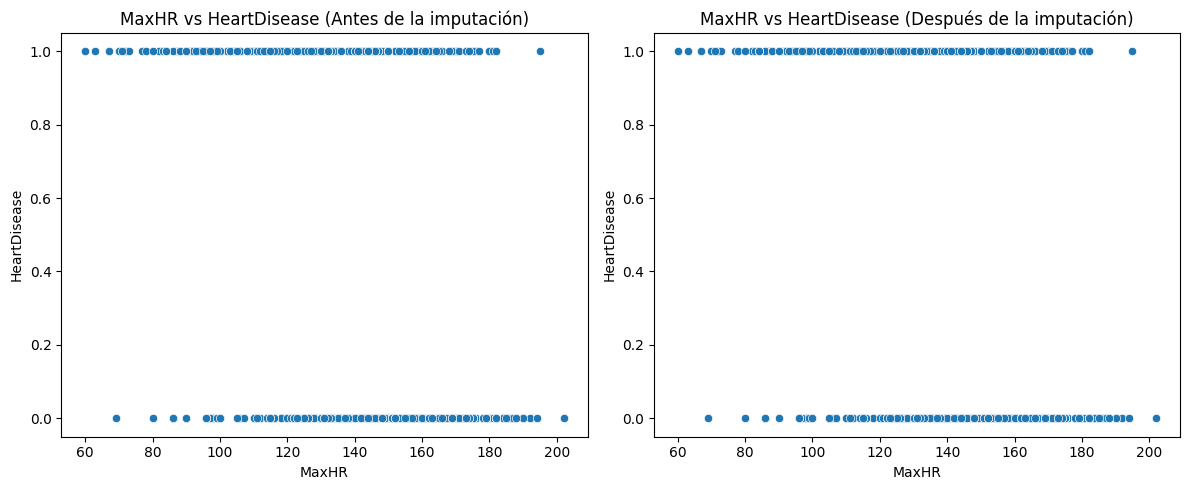

In [65]:
# Gráfico de dispersión de la variable objetivo vs MaxHR antes y después de la imputación
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=df_encoded_nulos['MaxHR'], y=df_encoded_nulos['HeartDisease'])
plt.title('MaxHR vs HeartDisease (Antes de la imputación)')
plt.xlabel('MaxHR')
plt.ylabel('HeartDisease')

plt.subplot(1, 2, 2)
sns.scatterplot(x=df_encoded_media['MaxHR'], y=df_encoded_media['HeartDisease'])
plt.title('MaxHR vs HeartDisease (Después de la imputación)')
plt.xlabel('MaxHR')
plt.ylabel('HeartDisease')

plt.tight_layout()
plt.show()

No hay una diferencia visual significativa entre los datos antes y después de la imputación.

La distribución de los puntos es similar en ambos casos, lo que sugiere que la imputación no alteró la relación entre MaxHR y HeartDisease.

HeartDisease es una variable binaria (0 o 1), lo que se refleja en la disposición de los puntos en dos franjas horizontales.

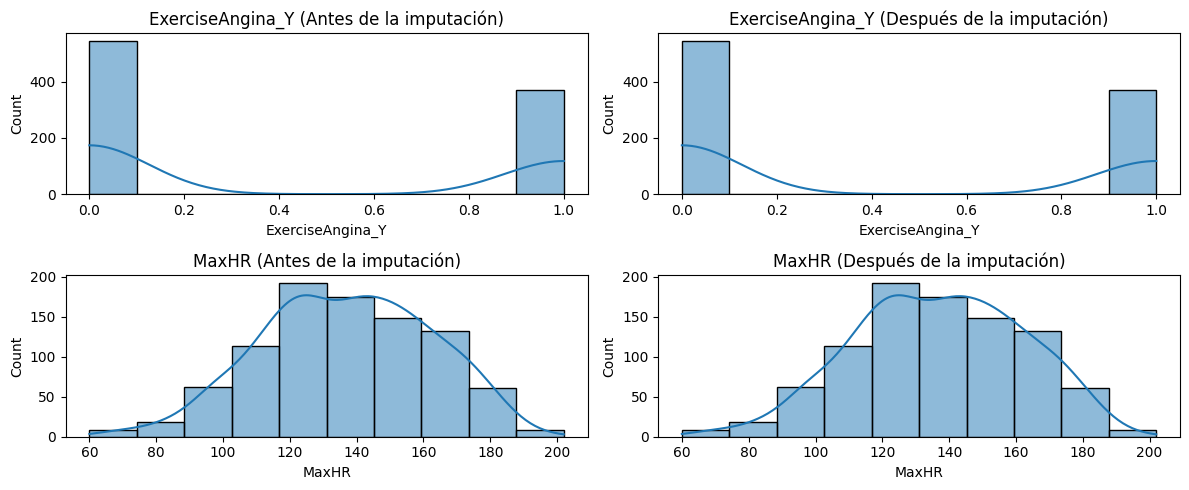

In [66]:
plt.figure(figsize=(12, 5))

# Histograma de ExerciseAngina_Y
plt.subplot(2, 2, 1)
sns.histplot(df_encoded_nulos['ExerciseAngina_Y'], bins=10, kde=True)
plt.title('ExerciseAngina_Y (Antes de la imputación)')

plt.subplot(2, 2, 2)
sns.histplot(df_encoded_media['ExerciseAngina_Y'], bins=10, kde=True)
plt.title('ExerciseAngina_Y (Después de la imputación)')

# Histograma de MaxHR
plt.subplot(2, 2, 3)
sns.histplot(df_encoded_nulos['MaxHR'], bins=10, kde=True)
plt.title('MaxHR (Antes de la imputación)')

plt.subplot(2, 2, 4)
sns.histplot(df_encoded_media['MaxHR'], bins=10, kde=True)
plt.title('MaxHR (Después de la imputación)')

plt.tight_layout()
plt.show()


Para ExerciseAngina_Y, la distribución antes y después de la imputación se mantiene prácticamente idéntica, lo que indica que no hubo cambios sustanciales en la proporción de personas con y sin angina inducida por el ejercicio.

En MaxHR, el histograma después de la imputación conserva la forma general de la distribución inicial, lo que indica que el método de imputación mantuvo la estructura original de los datos. Esto es clave para evitar sesgos en el análisis posterior.

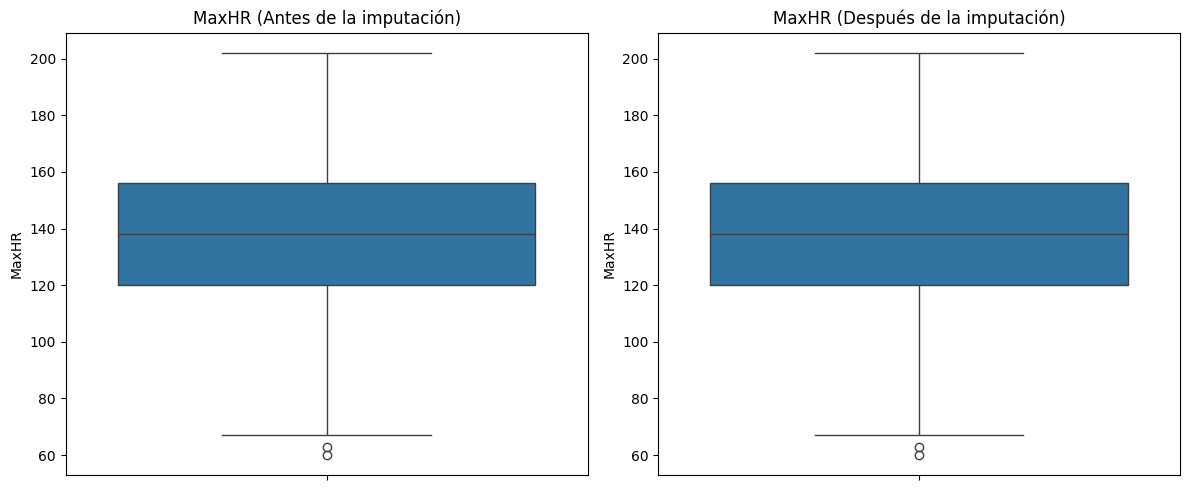

In [67]:
plt.figure(figsize=(12, 5))

# Boxplot de MaxHR antes y después de la imputación
plt.subplot(1, 2, 1)
sns.boxplot(y=df_encoded_nulos['MaxHR'])
plt.title('MaxHR (Antes de la imputación)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_encoded_media['MaxHR'])
plt.title('MaxHR (Después de la imputación)')

plt.tight_layout()
plt.show()


Los boxplots muestran que la mediana, el rango intercuartil y los valores atípicos se mantienen constantes antes y después de la imputación.

Esto sugiere que la imputación de datos no introdujo valores extremos ni alteró la distribución central de MaxHR.

### Tabla de contingencia

In [68]:
# prompt: definr rangos para MaxHR y crear tabla de contigencia con las variables ExerciseAngina_Y y MaxHR de df_encoded_media,

import pandas as pd
# Define ranges for MaxHR
max_hr_ranges = pd.cut(df_encoded_media['MaxHR'], bins=[70, 100, 130, 160, 200], labels=['70-100', '101-130', '131-160', '161-200'])

# Create the contingency table
contingency_table = pd.crosstab(df_encoded_media['ExerciseAngina_Y'], max_hr_ranges)

# Display the table
contingency_table


MaxHR,70-100,101-130,131-160,161-200
ExerciseAngina_Y,,,,
False,36,115,231,160
True,44,194,117,15


**Según la tabla de contigencia:**

La mayor proporción de personas que no presentaron angina (231 personas), se encuentra en un rango de frecuencias cardiacas entre 131 y 160

La mayor proporción de personas que sí presentaron angina (194 personas), se encuentra en un rango de frecuencias cardiacas entre 101 y 130

Para frecuencias observadas entre 70 y 130, son más las personas que sí presentaron angina, que las que no la presentaron

Para frecuencias observadas entre 131 y 200, son más las personas que no presentaron angina, que las que sí la presentaron

Esto explica la correlación negativa: aumenta MaxHR y disminuye la proporción de personas que presentan angina

Tiene sentido que las personas que presentan angina no puedan alcanzar frecuencias cardiacas más altas, no resisten el esfuerzo

Según la correlación la relación es negativa y moderada

# Conclusiones del análisis Bivariado

**¿Respuesta a la pregunta SMART?**

El análisis bivariado permitió explorar la relación entre la frecuencia cardíaca máxima (MaxHR) y la presencia de enfermedad cardíaca (HeartDisease). Mediante el uso de gráficos de dispersión, histogramas y boxplots, se observó que los individuos con enfermedad cardíaca tienden a presentar una frecuencia cardíaca máxima ligeramente inferior en comparación con aquellos sin la enfermedad. No obstante, la variabilidad observada dentro de cada grupo sugiere que esta relación no es del todo concluyente y podría estar influenciada por otros factores.

Adicionalmente, se analizó la variable ExerciseAngina_Y, la cual mostró una distribución diferenciada entre los grupos con y sin enfermedad cardíaca. La mayoría de los individuos sin enfermedad cardíaca no reportaron angina inducida por el ejercicio, mientras que una proporción significativamente mayor de aquellos con la enfermedad sí presentaron este síntoma. Esto indica que ExerciseAngina_Y podría ser un predictor relevante para identificar la presencia de enfermedad cardíaca.

**Sobre la imputación de datos**

La imputación de datos realizada en el análisis no introdujo cambios significativos en la distribución de las variables. Esto se observa en los histogramas y boxplots de MaxHR antes y después de la imputación, donde la forma y dispersión de los datos permanecen prácticamente iguales.

Para MaxHR: La media, mediana y la dispersión general no variaron considerablemente, lo que indica que la imputación mantuvo la estructura original de los datos sin introducir sesgos.

Para ExerciseAngina_Y: La distribución de esta variable categórica también se mantuvo estable, preservando la proporción de sujetos con y sin angina inducida por el ejercicio.

Esto sugiere que la estrategia de imputación utilizada fue adecuada y no alteró la interpretación del análisis. La ausencia de distorsiones en la distribución de los datos después de la imputación respalda la validez de las conclusiones extraídas del análisis bivariado.



**Conclusiones generales**

1. Relación entre MaxHR y HeartDisease: Se observó que las personas con enfermedad cardíaca tienden a tener valores más bajos de MaxHR. Sin embargo, la superposición de valores entre los grupos sugiere que MaxHR por sí sola no es un predictor concluyente de la enfermedad, sino que debe analizarse en conjunto con otras variables.

2. Impacto de ExerciseAngina_Y: La presencia de angina inducida por el ejercicio está más asociada con la presencia de enfermedad cardíaca. Este hallazgo refuerza la importancia de este indicador en evaluaciones médicas.

3. Efectividad de la imputación de datos: No se detectaron alteraciones significativas en la estructura de los datos después de la imputación, lo que sugiere que la técnica utilizada fue apropiada y que los análisis realizados después de la imputación son válidos.

4. Relevancia clínica y analítica: Aunque se identificaron tendencias interesantes, para obtener conclusiones más robustas sería recomendable realizar pruebas estadísticas adicionales y considerar la inclusión de otras variables relevantes. (estámos trabajando en proponer el modelo de predicción, esperamos adjuntarlo a la entrega final)